<a href="https://colab.research.google.com/github/VedantWani/Swarm-Intelligence/blob/master/Random_Inertia_Particle_Swarm_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

import copy

In [3]:
class Particle:
    pass

In [4]:
#export
class PSO:
    def __init__(self,c1,c2,weight_func,population, fitness_eval_func, n_dims, dim_limits):
        
        self.population = population
        self.fitness_eval_func = fitness_eval_func
        self.n_dims = n_dims
        self.dim_limits = dim_limits
        self.best_solutions = []
        self.weight_func = weight_func #weight is is function to adopt random intertia weight
        self.c1 = c1
        self.c2 = c2
        self.gbest = Particle()
        self.gbest.fitness = float('inf') #maximize
        self.Swarm = []
        
    def _initialize_population(self):
        for solution in range(self.population):
            start = 0
            particle = Particle()
            particle.position = np.array([])
            particle.velocity = np.array([])
            for end in self.dim_limits:
                
                pos_vec = np.random.uniform(*self.dim_limits[end], (end-start))
                velocity_vec = np.random.uniform(*self.dim_limits[end], (end-start))
                
                particle.position = np.concatenate((particle.position, pos_vec))
                particle.velocity = np.concatenate((particle.velocity, velocity_vec))
                
                start = end
            
            particle.fitness = self.fitness_eval_func(particle.position)
            
            particle.best_position = particle.position
            particle.best_fitness = particle.fitness
            
            if self.gbest.fitness > particle.best_fitness:
                self.gbest.fitness = particle.best_fitness
                self.gbest.position = particle.best_position
            
            
            self.Swarm.append(particle)
            
        self.best_solutions.append(self.gbest)
        
    def optimize(self):
        
        for particle in self.Swarm:
            cognitive = self.c1 * np.random.rand(self.n_dims) * (particle.best_position - particle.position)
            social = self.c2 * np.random.rand(self.n_dims) * (self.gbest.position - particle.position)
            particle.velocity = self.weight_func() * particle.velocity + cognitive + social
            particle.position = particle.position + particle.velocity
            
            particle.position = self._constraint_solutions(particle.position)
            
            particle.fitness = self.fitness_eval_func(particle.position)
            
            if particle.best_fitness > particle.fitness:
                particle.best_fitness = particle.fitness
                particle.best_position = particle.position
                
            if self.gbest.fitness > particle.best_fitness:
                self.gbest.fitness = particle.best_fitness
                self.gbest.postion = particle.best_position
             
        self.best_solutions.append(self.gbest)
        
    def _constraint_solutions(self, position):
        start = 0
        for end in self.dim_limits:
            position[start:end] = np.maximum(position[start:end], self.dim_limits[end][0]) #minimum limit
            position[start:end] = np.minimum(position[start:end], self.dim_limits[end][1]) # maximum limit
            
            start = end
            
        return position    

In [5]:
def sphere_fitness(position):
    total = 0
  
    for i in range(len(position)):
        total+=position[i]**2
    return total

In [6]:
def random_weight():
    return 0.5 * (np.random.rand() / 2)

In [7]:
dim_limits = {3:(-5,5)}

In [8]:
pso = PSO(c1 = 2, c2 = 2, weight_func=random_weight, population=50, fitness_eval_func=sphere_fitness,n_dims = 3, dim_limits=dim_limits)

In [9]:
xs = []
ys = []
zs = []

In [10]:
pso._initialize_population()
for i in range(1000):
    pso.optimize()
    xt = []
    yt = []
    zt = []
    for particle in pso.Swarm:
        xt.append(particle.position[0])
        yt.append(particle.position[1])
        zt.append(particle.position[2])
    xs.append(xt)
    ys.append(yt)
    zs.append(zt)

In [11]:
pso.gbest.fitness

0.0005452800857184733

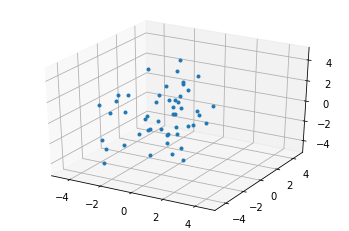

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sct, = ax.plot([], [], [], "o", markersize=3)
def update(ifrm, xa, ya, za):
    #print(ifrm)
    sct.set_data(xa[ifrm], ya[ifrm])
    sct.set_3d_properties(za[ifrm])
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
ani = animation.FuncAnimation(fig, update, frames=100, fargs=(xs,ys,zs), interval = 100)
HTML(ani.to_html5_video())